In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv("Hitters.csv").dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

In [13]:
x = df.drop(["Unnamed: 0", "League", "Division", "NewLeague", "Salary"], axis=1)
y = df.Salary

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AtBat    263 non-null    int64
 1   Hits     263 non-null    int64
 2   HmRun    263 non-null    int64
 3   Runs     263 non-null    int64
 4   RBI      263 non-null    int64
 5   Walks    263 non-null    int64
 6   Years    263 non-null    int64
 7   CAtBat   263 non-null    int64
 8   CHits    263 non-null    int64
 9   CHmRun   263 non-null    int64
 10  CRuns    263 non-null    int64
 11  CRBI     263 non-null    int64
 12  CWalks   263 non-null    int64
 13  PutOuts  263 non-null    int64
 14  Assists  263 non-null    int64
 15  Errors   263 non-null    int64
dtypes: int64(16)
memory usage: 34.9 KB


In [15]:
#split data intro train and test
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size = 0.6, random_state=1)

In [17]:
alphas = 10**np.linspace(10,-2,100)*0.4

# Lasso 

Text(0, 0.5, 'weights')

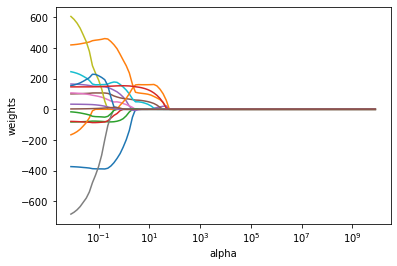

In [24]:
lasso = Lasso(max_iter = 10000, normalize = True)
coEffients= []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coEffients.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2,coEffients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')